## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [122]:
#Dan Kagan | Online Self-Paced |February 1st, 2021 @ 4pm | 
#Instructor: Jeff Herman | https://medium.com/@dankagan7/data-science-and-me-1d3e8a7d8bf2

#Module 1 Project Assignment:
# Your team is charged with doing data analysis and creating a presentation 
#...that explores what type of films are currently doing the best at the box office. 
#...You must then translate those findings into actionable insights that the CEO 
#...can use when deciding what type of films they should be creating.


###Questions
#1. What are the most popular movie genres on TMDB?
#2. What are the most lucrative types of films?
#3. How much do these movies cost to make?

#--------------------------------------Visualizations-Below----------------------------------------------#
#--------------------------------------------------------------------------------------------------------#

In [14]:
#Visualization 1 - TMDB "tmdb.movies.csv"
#Question: What are the most popular movie genres on TMDB?

#Imports
#Importing numpy for analytical calculations & pandas for handling data as a DataFrame object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Convert CSV file to DataFrame object and orient myself with the data
df = pd.read_csv('/Users/DanKagan/Development/Flatiron_Assignments/online_datascience/mod_1/mod1_project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/tmdb.movies.csv')
#df.info()

#Clean up DataFrame column names
df = df.rename(columns={
    'Unnamed: 0' : 'Film ID',
    'genre_ids' : 'Genre IDs',
    'original_language' : 'Original Language',
    'original_title' : 'Original Title',
    'popularity' : 'Popularity Rating',
    'release_date' : 'Release Date',
    'title' : 'Film Title',
    'vote_average' : 'Average Vote Score',
    'vote_count' : 'Total Votes'
})

#Update DataFrames' index and remove columns with irrelevant data
df = df.set_index('Film ID')
df = df.drop(['id', 'Original Language','Genre IDs'], axis=1)
df = df.drop([23819, 20617]) #Specifically drops a duplicate record of Ragnarok & Blade Runner 2049 from Top 25 (row)

#Turn Release Date column data from strings to Date objects
pd.to_datetime(df['Release Date'])

#Sort entire dataset by 'Popularity Rating'
df_tmdb_popularity_viz = df.sort_values(by='Popularity Rating', ascending=False)

#Show Top 25 most popular films
df_tmdb_popularity_viz.head(25)



,Original Title,Popularity Rating,Release Date,Film Title,Average Vote Score,Total Votes
Film ID,,,,,,
23811,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
23813,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [15]:
#Data Analysis of Top 25 TMDB most Popular films

#Average Popularity Rating among the Top 25 most popular TMDB films
df_tmdb_popularity_viz['Popularity Rating'].head(25).mean()

47.94191999999999

In [16]:
#Average Vote Score among the Top 25 most popular TMDB films
df_tmdb_popularity_viz['Average Vote Score'].head(25).mean()

7.244

In [17]:
#------------------------------------End-of-Question-1------------------------------------------#
#----------------------------------------------------------------------------------------------#

In [18]:
#Visualization 2 - The Movie Data Base "tmdb.movies.csv"
#Question: What are the most lucrative types of films?

#Convert CSV file to DataFrame object and orient myself with the data
df2 = pd.read_csv('/Users/DanKagan/Development/Flatiron_Assignments/online_datascience/mod_1/mod1_project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/bom.movie_gross.csv')

#Clean up DataFrame column names
df2 = df2.rename(columns={
    'title' : 'Title',
    'studio' : 'Studio',
    'domestic_gross' : 'Domestic Gross',
    'foreign_gross' : 'Foreign Gross',
    'grand_total_gross' : 'Grand Total Gross',
    'year' : 'Year'
})

df2.head(10)

,Title,Studio,Domestic Gross,Foreign Gross,Grand Total Gross,Year
0,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,1.341500e+09,2011
1,Avengers: Age of Ultron,BV,459000000.0,946400000,1.405400e+09,2015
2,Marvel's The Avengers,BV,623400000.0,895500000,1.518900e+09,2012
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,1.309500e+09,2018
4,Frozen,BV,400700000.0,875700000,1.276400e+09,2013
5,Wolf Warrior 2,HC,2700000.0,867600000,8.703000e+08,2017
6,Transformers: Age of Extinction,Par.,245400000.0,858600000,1.104000e+09,2014
7,Minions,Uni.,336000000.0,823400000,1.159400e+09,2015
8,Aquaman,WB,335100000.0,812700000,1.147800e+09,2018
9,Iron Man 3,BV,409000000.0,805800000,1.214800e+09,2013


In [19]:
#Visualization 3 - Top Grand Total Grossing

#Create DataFrame objects to analyze, sorted by highest total grossing, foreign grossing, & domestic grossing films 
df2_top_gt_gross = df2.sort_values(by='Grand Total Gross', ascending=False)
df2_top_foreign_gross = df2.sort_values(by='Foreign Gross', ascending=True)
df2_top_domestic_gross = df2.sort_values(by='Domestic Gross', ascending=False)

#Clean up total grossing DataFrame Object for clean graphing
df2_top_gt_gross = df2_top_gt_gross.drop(['Studio', 'Domestic Gross', 'Foreign Gross', 'Year'], axis=1)
df2_top_gt_gross = df2_top_gt_gross.rename(columns={'Grand Total Gross' : 'Grand Total'})


df2_top_gt_gross.head(10)

,Title,Grand Total
2,Marvel's The Avengers,1.518900e+09
1,Avengers: Age of Ultron,1.405400e+09
27,Black Panther,1.347000e+09
0,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
18,Star Wars: The Last Jedi,1.332600e+09
3,Jurassic World: Fallen Kingdom,1.309500e+09
4,Frozen,1.276400e+09
14,Beauty and the Beast (2017),1.263500e+09
30,Incredibles 2,1.242800e+09
9,Iron Man 3,1.214800e+09


Text(0, 0.5, 'Grand Total Gross (Billions)')

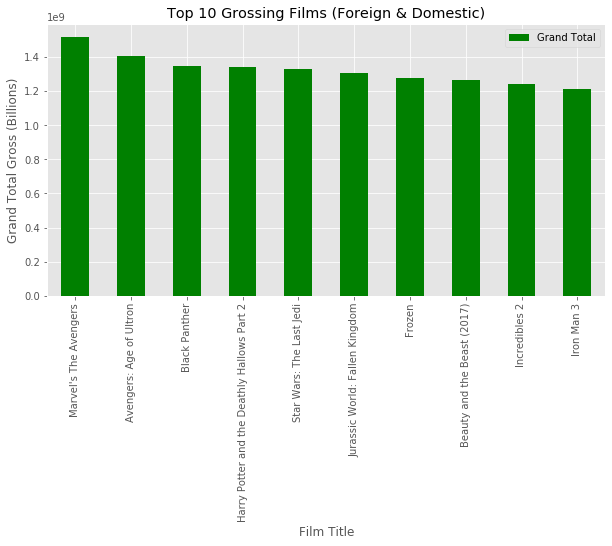

In [20]:
#Visualization 4 - Top 10 Grossing Films (Foreign & Domestic)

#Graphs Top  Total Grossing Films in the DataFrame object
df2_top_gt_gross.head(10).plot.bar(x='Title', y='Grand Total', color='green', figsize=(10,5))

#Adds labels to the graph
plt.title('Top 10 Grossing Films (Foreign & Domestic)')
plt.xlabel("Film Title")
plt.ylabel("Grand Total Gross (Billions)")

In [21]:
#------------------------------------End-of-Question-2------------------------------------------#
#----------------------------------------------------------------------------------------------#

In [22]:
#Visualization 5 -  "tn.movie_budgets.csv"
#Question 3: What are the most expensive movies to make?

#Convert CSV file to DataFrame object and orient myself with the data
df3 = pd.read_csv('/Users/DanKagan/Development/Flatiron_Assignments/online_datascience/mod_1/mod1_project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData/tn.movie_budgets 2.csv')


#Clean up DataFrame column names
df3 = df3.rename(columns={
    'release_date' : 'Release Date',
    'movie' : 'Movie Title',
    'production_budget' : 'Production Budget',
    'domestic_gross' : 'Domestic Gross',
    'worldwide_gross' : 'Worldwide Gross'
})

#Trim DataFrame object for easier viewing
df3_prodb = df3.drop(['Domestic Gross','Worldwide Gross','Release Date', 'id'], axis=1)

df3_prodb.head(10)

,Movie Title,Production Budget
0,Avatar,"$425,000,000"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000"
2,Dark Phoenix,"$350,000,000"
3,Avengers: Age of Ultron,"$330,600,000"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000"
5,Star Wars Ep. VII: The Force Awakens,"$306,000,000"
6,Avengers: Infinity War,"$300,000,000"
7,Pirates of the Caribbean: At Worldâs End,"$300,000,000"
8,Justice League,"$300,000,000"
9,Spectre,"$300,000,000"


In [23]:
#-------------------------------------End-of-Question-3------------------------------------------#
#------------------------------------------------------------------------------------------------#

In [24]:
#---------------------------------------Conclusion---------------------------------------------#
#----------------------------------------------------------------------------------------------#

#For Microsoft to begin creating movies that are going to be very popular and thus, lucrative, 
#their avenues are limited. The chances of creating a one-off film that ends up being lucrative 
#enough to justify the initial investment, although it is not impossible, is unlikely. More reasonably, 
#Microsoft would need to figure out what their competitive advantage is when it comes to the film-creation business, 
#of which owning the intellectual property of these consistently successful movies is not one of them.

#I believe that within the context of joining the film industry, Microsoft's most valuable asset is that 
#roughly 50-60 million people own some kind of an Xbox device. In this way, they are already in many peoples' 
#livingrooms, so there may be a lucrative solution for them providing access to certain sets of movies they 
#can offer for streaming.

#For all of the reasons described, I recommend that Microsoft does not get involved in creating new movie content. 
#There may be legitimate business opportunities that they could create by distributing other companyies' 
#content on their video game devices and even Windows operating system. None of these reasons, however, 
#are compelling enough to me to support Microsoft moving into this new industry. 
#Additionally, the opportunity cost of spending money on trying to create successful movies is signficiant, 
#as the cash could be used to improve some of their services that are more dominant, such as GitHub.

In [25]:
#-------------------------------------End-of-Notebook------------------------------------------#
#----------------------------------------------------------------------------------------------#